In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans


## Import du Dataset Wine Quality
- Le dataset Wine Quality est un dataset qui contient des informations sur des vins rouges et blancs.
- mettre le dataset dans un dataframe avec les labels des colonnes
- ajout d'une colonne 'target' pour distinguer les vins rouges des vins blancs

In [9]:
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

## Standardisation des données
- utiliser la fonction `StandardScaler` de `sklearn` pour standardiser les données
  - la standardisation consiste à soustraire la moyenne et à diviser par l'écart-type
  - elle est utile pour les algorithmes qui supposent que les données sont centrées et ont une variance de même ordre
- la standardisation est effectuée sur les données d'entraînement et de test
- les données d'entraînement sont utilisées pour calculer la moyenne et l'écart-type

In [12]:
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df.drop('target', axis=1))

## Creer le model KMeans de classification
- utiliser la fonction `KMeans` de `sklearn` pour créer un modèle de classification
- `fit` le modèle sur les données d'entraînement standardisées


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(wine_df_scaled)

KMeans(n_clusters=3, random_state=42)

In [16]:
clusters = kmeans.labels_

## Représentation graphique des clusters
- utiliser la librairie `matplotlib` pour afficher les clusters
- utiliser seaborn pour afficher les clusters en 3D

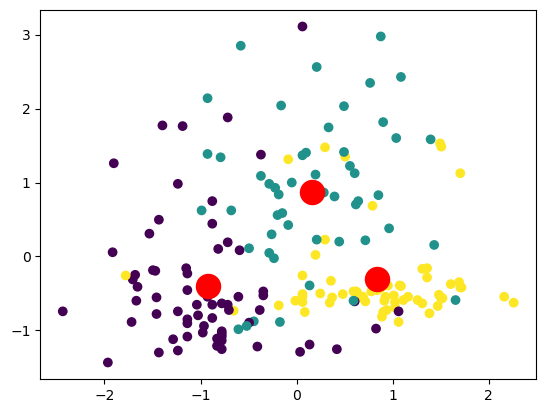

In [17]:
# matplotlib
plt.scatter(wine_df_scaled[:, 0], wine_df_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

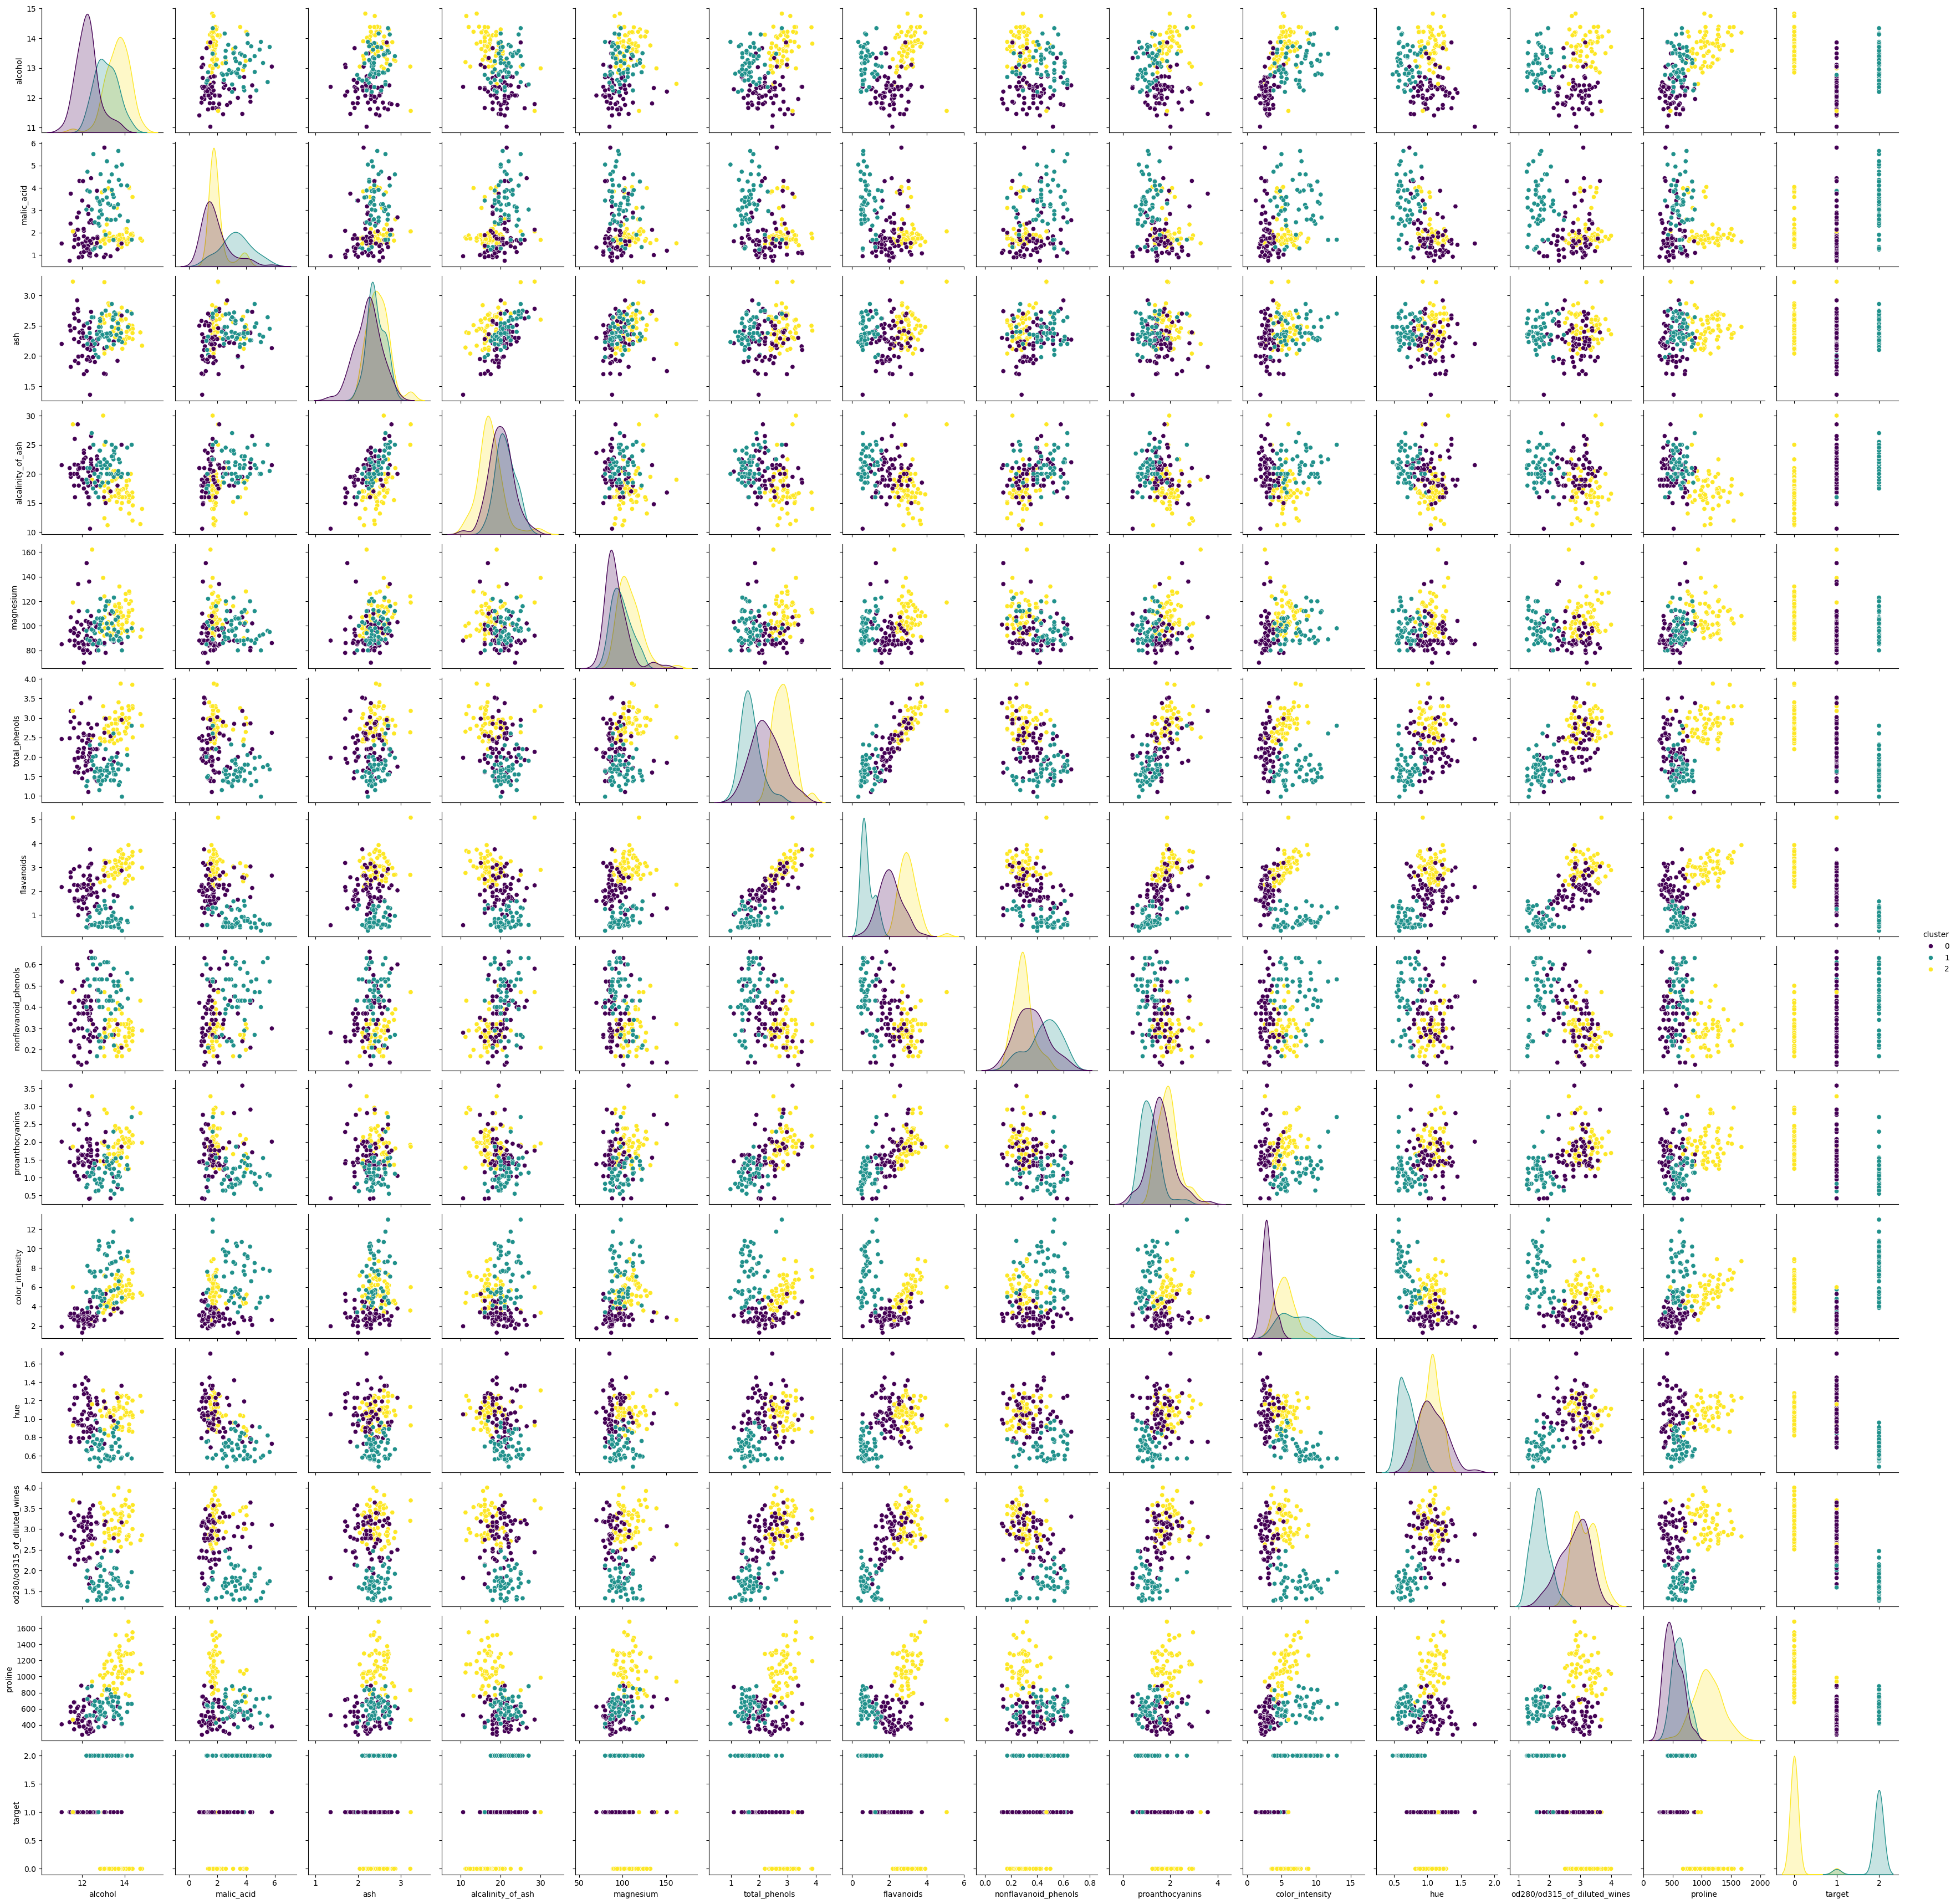

In [18]:
# seaborn
wine_df['cluster'] = clusters
sns.pairplot(wine_df, hue='cluster', palette='viridis')
plt.show()


## Verification de la qualité du model
- utiliser la fonction `accuracy_score` de `sklearn` pour calculer la précision du modèle
- utiliser la fonction `confusion_matrix` de `sklearn` pour afficher la matrice de confusion
  - la matrice de confusion est une matrice qui montre le nombre de prédictions correctes et incorrectes pour chaque classe
  - elle est utile pour évaluer la qualité d'un modèle de classification

In [19]:
# # Accuracy
# wine_df['target'] = wine_data.target
# wine_df['cluster'] = clusters
# wine_df['cluster'] = wine_df['cluster'].replace({0: 2, 1: 0, 2: 1})
# accuracy_score(wine_df['target'], wine_df['cluster'])


0.016853932584269662

faux positif :  0
faux negatif :  65
true positif :  3
true negatif :  0
accuracy :  0.016853932584269662


<Axes: >

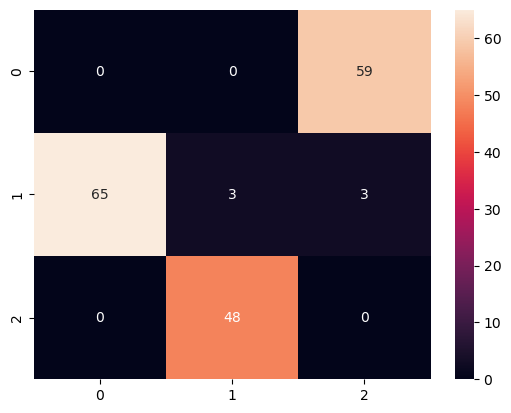

In [21]:
conf_matrix = confusion_matrix(wine_df['target'], clusters)

print("faux positif : ", conf_matrix[0][1])
print("faux negatif : ", conf_matrix[1][0])
print("true positif : ", conf_matrix[1][1])
print("true negatif : ", conf_matrix[0][0])
print("accuracy : ", (conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix))
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [24]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
	mask = (clusters == i)
	labels[mask] = mode(wine_df['target'][mask])[0]

In [26]:
accuracy = accuracy_score(wine_df['target'], labels)
accuracy

0.9662921348314607